# 3 Nonlinear Equations

In [4]:
import numpy as np
from pprint import pprint

from sympy import *
import sympy as sym
init_printing()

import matplotlib as mpl
# matplotlib for ploting
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D     # 3d
# for inline interactive plotting
%matplotlib inline

#mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('png', 'pdf')
# for better picture quality
%config InlineBackend.figure_format = 'retina'
#https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

import seaborn as sns
sns.set()
#sns.set_style(style= "whitegrid")
#plt.style.available
# bold graph style
plt.style.use('fivethirtyeight')

Not all methods discussed for univariate equation solving can be generalized to the multivariate case.
In particular, the bisection method cannot be directly generalized to a multivariate system of equations. Newton’s method, however, can be generalized to multivariate systems.

In the **`SciPy`** optimize module, `broyden1` and `broyden2` provide two implementations of Broyden’s method using different approximations of the Jacobian, and the function `optimize.fsolve` provides an implementation of a Newton-like method, where optionally the Jacobian can be specified, if available.

As with Newton’s method for a univariate non-linear system of equations, the **initial guess** for the solution
is important, and different initial guesses may result in different solutions being found.



One of the most basic numerical operations encountered in computational economics
is to find the solution of a system of non-linear equations. Non-linear equations generally
arise in one of two forms. In the non-linear *root finding problem*, a function $f$
mapping $R^n$ to $R^n$ is given and one must compute an n-vector $x$, called a *root* of $f$,
that satisfies

$$f(x) = 0$$


In the non-linear fixed-point problem, a function $g$ from $R^n$ to $R^n$ is given and one
must compute an n-vector x called a fixed-point of $g$, that satisfies

$$x = g(x)$$


The two forms are equivalent. The rootfinding problem may be recast as a fixed-point
problem by letting $g(x) = x - f(x)$. Conversely, the fixed-point problem may be recast
as a root finding problem by letting $f(x) = x - g(x)$.


In the related complementarity problem, two n-vectors $a$ and $b$, with $a < b$, and
a function $f(.)$ from $R^n$ to $R^n$ are given, and one must compute an n-vector $x \in [a, b]$,
that satisfies


$$x_i > a_i \rightarrow f_i(x) \forall i = 1,...,n$$

$$x_i < b_i \rightarrow f_i(x) \forall i = 1,...,n$$


The root finding problem is a special case of complementarity problems, in which $a_i =
-\infty$ and $b_i = +\infty$ for all i. However, the complementarity problem is not simply to
find a root that lies within specified bounds. An element $f_i(x)$ may be non-zero at a
solution of the complementarity problem, provided that $x_i$ equals one of the bounds
$a_i$ or $b_i$.




https://github.com/QuantEcon/QuantEcon.lectures.code


## 3.1 Bisection Method

The bisection method is perhaps the simplest and most robust method for computing
the root of a continuous real-valued function defined on a bounded interval of the real line.



The bisection method is an iterative procedure. Each iteration begins with an
interval known to contain or to bracket a root of f, meaning the function has different
signs at the interval endpoints. The interval is bisected into two subintervals of equal
length.

The bisection method's greatest strength is its robustness. In contrast to other
rootfinding methods, the bisection method is guaranteed to compute a root to a
prescribed tolerance in a known number of iterations, provided valid data as an input.


https://lectures.quantecon.org/py/scipy.html#roots-and-fixed-points

https://en.wikipedia.org/wiki/Bisection_method

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Bisection_method.svg/375px-Bisection_method.svg.png)

In [ ]:
# Display the root finding problem in a figure
plt.figure()
x = np.linspace(0,3,100)
plt.plot(x,x**3-2);
plt.plot(x, x-x);

In [ ]:
# set tolerance 
tol = 10e-10

In [ ]:
def mybisect(fun, a, b, tol=10e-10):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b

    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        # === if root is between lower and middle === #
        if fun(middle) > 0:  
            lower, upper = lower, middle
        # === if root is between middle and upper  === #
        else:              
            lower, upper = middle, upper

    return 0.5 * (upper + lower)

In [ ]:
## Example 1

# Define the function whose root we want to compute
f =lambda x: x**3-2

# Find the root with the bisection routine we wrote
mybisect(f, 0, 2)

In fact SciPy provides its own bisection function.

In [ ]:
from scipy.optimize import bisect
f =lambda x: x**3-2

# Find the root with the scipy bisection routine
bisect(f, 0, 2)

In [ ]:
## Example 2

#Consider a more complicated function
f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1

In [ ]:
# Display the root finding problem in a figure
plt.figure()
x = np.linspace(0,1,100)
plt.plot(x,np.sin(4 * (x - 0.25)) + x + x**20 - 1);
plt.plot(x, x-x);

In [ ]:
# Find the root with the bisection routine we wrote
mybisect(f, 0, 2)

In [ ]:
# Find the root with the scipy bisection routine
bisect(f, 0, 2)

In [ ]:
## Example 3
#Consider a function with two roots

# Display the root finding problem in a figure
plt.figure()
x = np.linspace(-1,3,100)
plt.plot(x,x ** 3 - 2 * x ** 2);
plt.plot(x, x-x);

In [ ]:
# Find the root with the scipy bisection routine

def f(x):
    """returns f(x)=x^3-2x^2. Has roots at
    x=0 (double root) and x=2"""
    return x ** 3 - 2 * x ** 2

# Main program starts here
# Find the root with [1.5,3] as the initial range
x = bisect(f, 1.5, 3, xtol=1e-6)

print("The root x is approximately x=%14.12g,\n"
      "The error is less than 1e-6." % (x))
print("The error from the exact root is %g." % (2 - x))

The `bisect()` function takes three compulsory arguments: 

- (i) the function `f(x)`, 

- (ii) a lower limit `a` (for which we have chosen 1.5 in our example) and 

- (ii) an upper limit `b` (for which we have chosen 3). The optional parameter xtol determines the maximum error of the method.

One of the requirements of the bisection method is that the interval `[a, b]` has to be chosen such that the function is either positive at`a` and negative at `b`, or that the function is negative at `a` and postive at `b`. In other words: `a` and `b` have to bracket a root.

In [ ]:
# Find the root with [0.00000001,3] as the initial range.
# The lower bound is now much closer to 0 but still does not find this root.
x = bisect(f, 0.00000001, 3, xtol=1e-6)

print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (x))
print("The error from the exact root is %g." % (2 - x))

In [ ]:
# Find the root with [-0.5,3] as the initial range.
# The lower bound is now much closer to 0 but still does not find this root.
x = bisect(f, -0.5, 3, xtol=1e-6)

print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (x))
print("The error from the exact root is %g." % (2 - x))

In [ ]:
# Find the root with [-1,3] as the initial range.
# The lower bound is now below 0 but we still do not find this root.
x = bisect(f, -1, 3, xtol=1e-6)

print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (x))
print("The error from the exact root is %g." % (2 - x))

In [ ]:
# Find the root with [-1,1.5] as the initial range.
# It fails because we did not bracket the solution!
x = bisect(f, -1, 2.1, xtol=1e-6)

print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (x))
print("The error from the exact root is %g." % (2 - x))

## 3.2 Function Iteration
Function iteration is a relatively simple technique that may be used to compute a
fixed-point, $x = g(x)$, of a function from $R^n$ to $R^n$. The technique is also applicable
to a rootfinding problem $f(x) = 0$, by recasting it as the equivalent fixed-point
problem $x = x - f(x)$.





![](http://www.yaroslavvb.com/research/ideas/hmms/ising-fixed-point-blogpost/HTMLFiles/blogpost_6.gif)

ref: 

https://en.wikipedia.org/wiki/Fixed-point_iteration

http://yaroslavvb.blogspot.ca/2007/11/belief-propagation-and-fixed-point.html

In [5]:
def myfixedpoint(fun, x0, maxit=1000, tol=10e-10):
    """
    Computes the fixed point of function f, using a function iteration algorithm
    """
    fx = x0
    for it in range(maxit):
        x = fx
        fx = fun(x) 
        diff = np.linalg.norm(x - fx)

        if diff < tol:
            
            return x

In [2]:
def g(x):
    return x**0.5


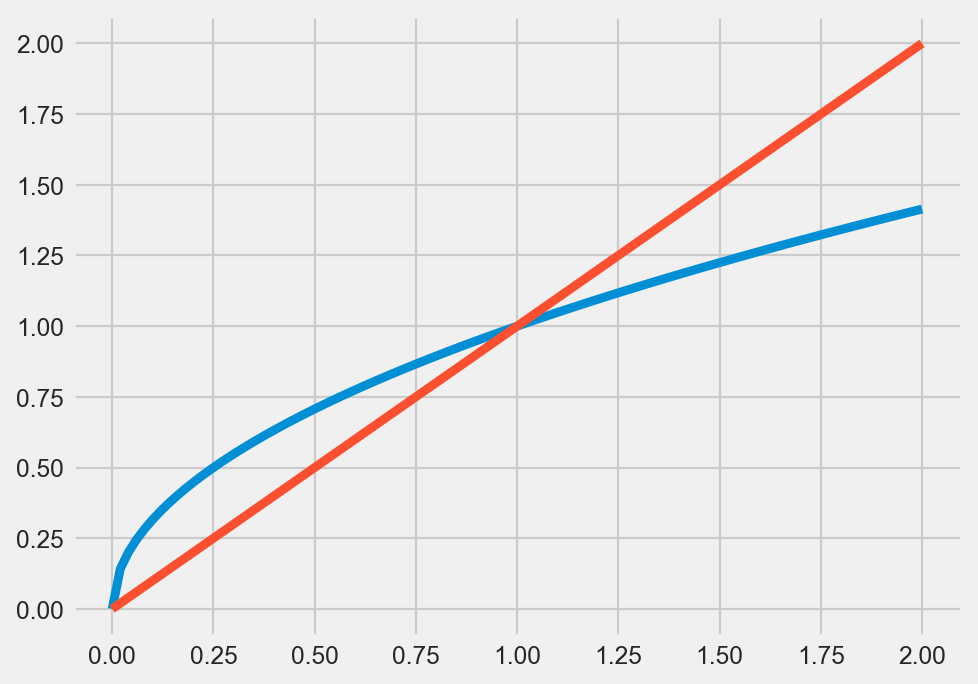

In [6]:
# Display the fixed point problem in a figure
plt.figure()
x = np.linspace(0,2,100)
plt.plot(x,x**0.5);
plt.plot(x, x);

In [7]:
# Find the fixed point with the routine we wrote
myfixedpoint(g, x0=0.4) # 0.4 is an initial guess

SciPy has a function for finding (scalar) fixed points too

In [ ]:
from scipy.optimize import fixed_point

# Find the fixed point with the scipy routine
fixed_point(lambda x: x**0.5, 0.4)  # 0.4 is an initial guess

Let's consider an example that is not well-behaved (it leads to an order-2 cycle)

In [ ]:
h = lambda x: 1.0-x

In [ ]:
# Display the fixed point problem in a figure
plt.figure()
x = np.linspace(0,2,10)
plt.plot(x,1.0-x);
plt.plot(x, x);

In [ ]:
#This is doomed to fail
myfixedpoint(h, x0=0.4) # 0.4 is an initial guess

In [ ]:
#This (surprisingly) does work
fixed_point(lambda x: 1.0-x, 0.4)  # 0.4 is an initial guess

Alternatively, we can transform the problem into its root-finding counterpart:

In [ ]:
i = lambda x: x-1.0+x

In [ ]:
#This is dangerous, as it might cycle forever
mybisect(i, 0, 2)